### 1-（单层）感知机
感知器是最简单的人工神经网络结构之一，由 Frank Rosenblatt 发明于 1957 年。它基于一种稍微不同的人工神经元（见图 10-4），阈值逻辑单元（TLU），或称为线性阈值单元（LTU）：输入和输出是数字（而不是二元开/关值），并且每个输入都连接一个权重。TLU 计算其输入的加权和（z = W[1]x[1] + W[2]x[2]+ ... + W[n]x[n] = x^T · W），然后将阶跃函数应用于该和，并输出结果：h[W](x) = step(z)，其中z = x^T · W。<br>
<img src='https://hands1ml.apachecn.org/docs/img/8b2cbad5c6f932fabbea3c87de926f8c.png'><br>
感知机最常用的阶跃函数是单位阶跃函数（Heaviside step function），见公式 10-1。有时候也使用符号函数sgn。<br>
<img src='https://hands1ml.apachecn.org/docs/img/93692150431464017b2aa57680078626.png'><br>
单一 TLU 可用于简单的线性二元分类。它计算输入的线性组合，如果结果超过阈值，它输出正类或者输出负类（就像逻辑回归分类或线性 SVM 分类）。<br>
感知器只由一层 TLU 组成，每个 TLU 连接到所有输入。（全连接层：当一层的神经元连接着前一层的每个神经元时，该层被称为全连接层，或紧密层。）。感知机的输入来自输入神经元，输入神经元只输出从输入层接收的任何输入。所有的输入神经元位于输入层。此外，通常再添加一个偏置特征（X[0] = 1）：这种偏置特性通常用一种称为偏置神经元的特殊类型的神经元来表示，它总是输出 1。图 10-5 展示了一个具有两个输入和三个输出的感知机，它可以将实例同时分成为三个不同的二元类，这使它成为一个多输出分类器。<br>
<img src='https://hands1ml.apachecn.org/docs/img/0c4ef3e739a09224456bd8f4f31b38a6.png'><br>
那么感知器是如何训练的呢？Frank Rosenblatt 提出的感知器训练算法在很大程度上受到 Hebb 规则的启发。在 1949 出版的《行为组织》一书中，Donald Hebb 提出，当一个生物神经元经常触发另一个神经元时，这两个神经元之间的联系就会变得更强。这个规则后来被称为 Hebb 规则（或 Hebbian learning）。使用这个规则的变体来训练感知器，该规则考虑了网络所犯的误差。更具体地，感知器一次被馈送一个训练实例，对于每个实例，它进行预测。对于每一个产生错误预测的输出神经元，修正输入的连接权重，以获得正确的预测。公式 10-3 展示了 Hebb 规则。<br>
<img src='https://hands1ml.apachecn.org/docs/img/b233f77d24ba573df38c4a3b18fccc83.png'><br>
每个输出神经元的决策边界是线性的，因此感知器不能学习复杂的模式（比如 Logistic 回归分类器）。然而，如果训练实例是线性可分的，Rosenblatt 证明该算法将收敛到一个解。这被称为感知器收敛定理。


In [1]:
# Scikit-Learn 提供了一个Perceptron类，它实现了一个 单 TLU 网络。它可以实现大部分功能，例如用于鸢尾花数据集
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)  # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]]) 
y_pred

C:\Users\86182\AppData\Local\Temp\ipykernel_15744\3900204665.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)  # Iris setosa?


array([0])

你可能注意到，感知器学习算法和随机梯度下降很像。事实上，sklearn 的Perceptron类相当于使用具有以下超参数的 SGDClassifier：loss="perceptron"，learning_rate="constant"，eta0=1（学习率），penalty=None（无正则化）。与逻辑回归分类器相反，感知机不输出类概率，而是基于硬阈值进行预测。这是逻辑回归优于感知机的一点。<br>
在 1969 年题为“感知机”的专著中，Marvin Minsky 和 Seymour Papert 强调了感知器的许多严重缺陷，特别是它们不能解决一些琐碎的问题（例如，异或（XOR）分类问题）；参见图 10-6 的左侧）。当然，其他的线性分类模型（如 Logistic 回归分类器）也都实现不了，但研究人员期望从感知器中得到更多，他们的失望是很大的，导致许多人彻底放弃了神经网络，而是转向高层次的问题，如逻辑、问题解决和搜索。<br>
然而，事实证明，感知机的一些局限性可以通过堆叠多个感知机消除。由此产生的人工神经网络被称为多层感知机（MLP）。特别地，MLP 可以解决 XOR 问题，你可以通过计算图 10-6 右侧所示的 MLP 的输出来验证输入的每一个组合：输入(0, 0)或(1, 1)网络输出 0，输入(0, 1)或(1, 0)它输出 1。除了四个连接的权重不是 1，其它连接都是 1。<br>
<img src='https://hands1ml.apachecn.org/docs/img/6930b04814efddf8ea4561e2f337bbb7.png'><br>

### 2-多层感知机MLP与反向传播BP
MLP 由一个输入层、一个或多个称为隐藏层的 TLU 、一个输出层（见图 10-7）组成。靠近输入层的层，通常被称为浅层，靠近输出层的层通常被称为深层。除了输出层，每一层都有一个偏置神经元，并且全连接到下一层。注意：信号是从输入到输出单向流动的，因此这种架构被称为前馈神经网络（FNN）。当人工神经网络有多个隐含层时，称为深度神经网络（DNN）。深度学习研究的是 DNN 和深层计算模型。但是大多数人用深度学习泛化代替神经网络，即便网络很浅时。<br>
<img src='https://hands1ml.apachecn.org/docs/img/523379c16c7d187fad08480319499a81.png'><br>
多年来，研究人员努力寻找一种训练 MLP 的方法，但没有成功。但在 1986，David Rumelhart、Geoffrey Hinton、Ronald Williams 发表了一篇突破性的论文，提出了至今仍在使用的反向传播训练算法。总而言之，反向传播算法是使用了高效梯度计算的梯度下降算法（见第 4 章）：只需要两次网络传播（一次向前，一次向后），就可以算出网络误差的、和每个独立模型参数相关的梯度。换句话说，反向传播算法为了减小误差，可以算出每个连接权重和每个偏置项的调整量。当得到梯度之后，就做一次常规的梯度下降，不断重复这个过程，直到网络得到收敛解。<br><br>
笔记：自动计算梯度被称为自动微分。有多种自动微分的方法，各有优缺点。反向传播使用的是反向模式自微分。这种方法快而准，当函数有多个变量（连接权重）和多个输出（损失函数）要微分时也能应对。附录 D 介绍了自微分。<br><br>

#### 对 反向传播算法（BP） 做详细分解：

1-每次处理一个微批次（假如每个批次包含 32 个实例），用训练集多次训练 BP，每次被称为一个周期（epoch）；

2-前向传播：每个微批次先进入输入层，输入层再将其发到第一个隐藏层。计算得到该层所有神经元的（微批次的每个实例的）输出。输出接着传到下一层，直到得到输出层的输出。这个过程就是前向传播：就像做预测一样，只是保存了每个中间结果，中间结果要用于反向传播；

3-然后计算输出误差（使用损失函数比较目标值和实际输出值，然后返回误差）；

4-反向传播：接着，计算每个输出连接对误差的贡献量。这是通过链式法则（就是对多个变量做微分的方法）实现的；然后还是使用链式法则，计算最后一个隐藏层的每个连接对误差的贡献，这个过程不断向后传播，直到到达输入层。

5-最后，BP 算法做一次梯度下降步骤，用刚刚计算的误差梯度调整所有连接权重。

警告：随机初始化隐藏层的连接权重是很重要的。假如所有的权重和偏置都初始化为 0，则在给定一层的所有神经元都是一样的，BP 算法对这些神经元的调整也会是一样的。换句话，就算每层有几百个神经元，模型的整体表现就像每层只有一个神经元一样，模型会显得笨笨的。如果权重是随机初始化的，就可以打破对称性，训练出不同的神经元。

#### 激活函数调整
为了使 BP 算法正常工作，作者对 MLP 的架构做了一个关键调整：用 Logistic 函数（sigmoid）代替阶跃函数，σ(z) = 1 / (1 + exp(–z))。这是必要的，因为阶跃函数只包含平坦的段，因此没有梯度（即微分恒定为0），而 Logistic 函数处处都有一个定义良好的非零导数，允许梯度下降在每步上取得一些进展。反向传播算法也可以与其他激活函数一起使用，下面就是两个流行的激活函数：

双曲正切函数： tanh (z) = 2σ(2z) – 1
类似 Logistic 函数，它是 S 形、连续可微的，但是它的输出值范围从-1 到 1（不是 Logistic 函数的 0 到 1），这往往使每层的输出在训练开始时或多或少都变得以 0 为中心，这常常有助于加快收敛速度。

ReLU 函数：ReLU(z) = max(0, z)
ReLU 函数是连续的，但是在z=0时不可微（斜率突然改变，导致梯度下降在 0 点左右跳跃），ReLU 的变体是当z<0时，z=0。但在实践中，ReLU 效果很好，并且具有计算快速的优点，于是成为了默认激活函数。最重要的是，它没有最大输出值，这有助于减少梯度下降期间的一些问题。

这些流行的激活函数及其变体如图 10-8 所示。但是，究竟为什么需要激活函数呢？如果将几个线性变化链式组合起来，得到的还是线性变换。如果层之间不具有非线性，则深层网络和单层网络其实是等同的，这样就不能解决复杂问题。相反的，足够深且有非线性激活函数的 DNN，在理论上可以近似于任意连续函数。<br>
<img src='https://hands1ml.apachecn.org/docs/img/35080cf52f5e9599c8ae129bb2b5d295.png'><br>

#### 分类 MLP
二分类：MLP可用于分类，对于二元分类问题，只需要一个使用 Logistic 激活的输出神经元：输出是一个 0 和 1 之间的值，作为正类的估计概率。

多标签：MLP 也可以处理多标签二元分类（见第 3 章）。例如，邮件分类系统可以预测一封邮件是垃圾邮件，还是正常邮件，同时预测是紧急，还是非紧急邮件。这时，就需要两个输出神经元，两个都是用 Logistic 函数：第一个输出垃圾邮件的概率，第二个输出紧急的概率。更为一般的讲，需要为每个正类配一个输出神经元。多个输出概率的和不一定非要等于 1。这样模型就可以输出各种标签的组合：非紧急非垃圾邮件、紧急非垃圾邮件、非紧急垃圾邮件、紧急垃圾邮件。

多分类：对于多分类问题（比如对于数字图片分类，可以是类 0 到类 9），则每一类都要有一个输出神经元，整个输出层（见图 10-9）要使用 softmax 激活函数。softmax 函数可以保证，每个估计概率位于 0 和 1 之间，并且各个值相加等于 1。<br>
<img src='https://hands1ml.apachecn.org/docs/img/28e6d457d56a02086f2ceff72ac9d1e2.png'><br>

损失函数：因为要预测概率分布，交叉商损失函数（也称为对数损失，见第 4 章）是不错的选择。

表 10-2 概括了分类 MLP 的典型架构。<br>
<img src='https://hands1ml.apachecn.org/docs/img/a448b0d1e942484bff4a067c11441c2e.png'><br>

#### 回归 MLP
输出：MLP可以用来回归任务。如果想要预测一个单值（例如根据许多特征预测房价），就只需要一个输出神经元，它的输出值就是预测值。对于多变量回归（即一次预测多个值），则每一维度都要有一个神经元。例如，想要定位一张图片的中心，就要预测 2D 坐标，因此需要两个输出神经元。如果再给对象加个边框，还需要两个值：对象的宽度和高度。

激活函数：通常，当用 MLP 做回归时，输出神经元不需要任何激活函数。<br>
如果要让输出是正值，则可在输出值使用 ReLU 激活函数。另外，还可以使用 softplus 激活函数，这是 ReLu 的一个平滑化变体：softplus(z) = log(1 + exp(z))。z是负值时，softplus 接近 0，z是正值时，softplus 接近z。最后，如果想让输出落入一定范围内，则可以使用调整过的 Logistic 或双曲正切函数：Logistic 函数用于 0 到 1，双曲正切函数用于 -1 到 1。

损失函数：训练中的损失函数一般是均方误差，但如果训练集有许多异常值，则可以使用平均绝对误差。另外，也可以使用 Huber 损失函数，它是前两者的组合。<br>
提示：当误差小于阈值δ时（一般为 1），Huber 损失函数是二次的；误差大于阈值时，Huber 损失函数是线性的。相比均方误差，线性部分可以让 Huber 对异常值不那么敏感，二次部分可以让收敛更快，也比均绝对误差更精确。

表 10-1 总结了回归 MLP 的典型架构。<br>
<img src='https://hands1ml.apachecn.org/docs/img/86424dc7bed03e26a159be77a1f3fc8a.png'><br>


### 3-用 Keras 实现 MLP
Keras 是一个深度学习高级 API，可以用它轻松地搭建、训练、评估和运行各种神经网络。（将 GitHub 上的 Keras 参考实现称为多后端 Keras）Keras在GitHub 上的开源代码（2015）：https://github.com/keras-team/keras<br>
为了进行神经网络计算，必须要有计算后端的支持。目前可选三个流行库：TensorFlow、CNTK 和 Theano。TensorFlow 捆绑了自身的 Keras 实现 —— tf.keras，它只支持 TensorFlow 作为后端，但提供了更多使用的功能（见图 10-10）：例如，tf.keras支持 TensorFlow 的 Data API，加载数据更轻松，预处理数据更高效。<br>
自从 2016 年底，出现了 Kera 的其它实现。现在已经可以在 Apache MXNet、苹果 Core ML、JavaScript 或 TypeScript（浏览器）、PlaidML（各种 GPU，不限于 Nvidia）上运行 Keras。<br>
<img src='https://hands1ml.apachecn.org/docs/img/d60bca82f536fee2404c573dc5d3bca4.png'><br>
排在 Keras 和 TensorFlow 之后最流行的深度学习库，是 Facebook 的 PyTorch。PyTorch 的 API 与 Keras 很像，所以掌握了 Keras，切换到 PyTorch 也不难。得益于易用性和详实的文档（TensorFlow 1 的文档比较一般），PyTorch 在 2018 年广泛流行开来。<br>
TensorFlow 和 PyTorch的比较：但是，TensorFlow 2 和 PyTorch 一样简单易用，因为 TensorFlow 使用了 Keras 作为它的高级 API，并简化清理了 TensorFlow 的其它 API。TensorFlow 的文档也改观了，容易检索多了。相似的，PyTorch 的缺点（可移植性差，没有计算图分析）在 PyTorch 1.0 版本中也得到了优化。

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
tf.__version__ , keras.__version__

('2.12.0', '2.12.0')

keras功能介绍：<br>
https://keras.io/api/

使用顺序 API 搭建、训练、评估和使用回归 MLP 做预测，和前面的分类 MLP 很像。区别在于输出层只有一个神经元（因为只想预测一个值而已），也没有使用激活函数，损失函数是均方误差。因为数据集有噪音，我们就是用一个隐藏层，并且神经元也比之前少，以避免过拟合：

#### 3-1 使用顺序 API 搭建分类 MLP
首先加载数据集。这章用的数据集是 Fashion MNIST，它是 MNIST 一个替代品，格式与 MNIST 完全相同（70000 张灰度图，每张的像素是28 × 28，共有 10 类），图的内容是流行物品，而不是数字，每类中的图片更丰富，识图的挑战性比 MNIST 高得多。

In [4]:
# 使用 Keras 加载数据集
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 

In [5]:
# 当使用 Keras 加载 MNIST 或 Fashion MNIST 时，和 Scikit-Learn 加载数据的一个重要区别是，
# 每张图片是28 × 28的数组，而不是大小是 784 的 1D 数组。
# 另外像素的强度是用整数（0 到 255）表示的，而不是浮点数（0.0 到 255.0）。
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
# 该数据集已经分成了训练集和测试集，但没有验证集。所以要建一个验证集
# 另外，因为要用梯度下降训练神经网络，必须要对输入特征进行缩放。简单起见，通过除以255.0将强度范围变为0-1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [7]:
# 对于 Fashion MNIST，需要分类名的列表：
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 
class_names[y_train[0]]

'Coat'

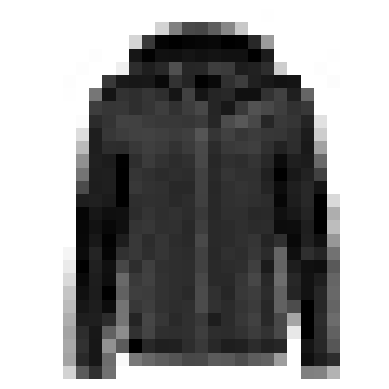

In [8]:
# 可视化
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_train[0:1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

step1-用顺序 API 创建模型

In [9]:
# 搭建一个拥有两个隐含层的分类 MLP：

# 第一行代码创建了一个顺序 模型，这是 Keras 最简单的模型，是由单层神经元顺序连起来的，被称为顺序 API
model = keras.models.Sequential()
# 接下来创建了第一层，这是一个Flatten层，它的作用是将每个输入图片转变为 1D 数组：
# 如果输入数据是X，该层则计算X.reshape(-1, 1)。该层没有任何参数，只是做一些简单预处理。
# 因为是模型的第一层，必须要指明input_shape，input_shape不包括批次大小，只是实例的形状。
# 另外，第一层也可以是keras.layers.InputLayer，设置input_shape=[28,28]
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 然后，添加了一个有 300 个神经元的紧密层，激活函数是 ReLU。
# 每个紧密层只负责自身的权重矩阵，权重矩阵是神经元与输入的所有连接权重。
# 紧密层还要负责偏置项（每个神经元都有一个偏置项）向量。当紧密层收到输入数据时，就利用公式 10-2 进行计算
model.add(keras.layers.Dense(300, activation="relu"))
# 接着再添加第二个紧密层，激活函数仍然是 ReLU
model.add(keras.layers.Dense(100, activation="relu"))

# 最后，加上一个拥有 10 个神经元的输出层（每有一个类就要有一个神经元），
# 激活函数是 softmax（保证输出的概率和等于 1，因为就只有这10个类，具有排他性）
model.add(keras.layers.Dense(10, activation="softmax")) 

In [10]:
# 除了一层一层加层，也可以传递一个层组成的列表：
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
]) 

# 模型的summary()方法可以展示所有层，包括每个层的名字（名字是自动生成的，除非建层时指定名字），
# 输出的形状（None代表批次大小可以是任意值），和参数的数量。
# 最后会输出所有参数的数量，包括可训练和不可训练参数。
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


紧密层通常有许多参数。比如，第一个隐含层有784 × 300个连接权重，再加上 300 个偏置项，总共有 235500 个参数。这么多参数可以让模型具有足够的灵活度以拟合训练数据，但也意味着可能有过拟合的风险，特别是当训练数据不足时。后面再讨论这个问题。

In [11]:
# 使用属性，获取神经层很容易，可以通过索引或名称获取对应的层：
model.layers

hidden1 = model.layers[1]
hidden1.name

model.get_layer('dense_3') is hidden1

True

In [12]:
# 可以用get_weights()和set_weights()方法，获取神经层的所有参数。对于紧密层，参数包括连接权重和偏置项：
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

紧密层是随机初始化连接权重的（为了避免对称性），偏置项则是 0。如果想使用不同的初始化方法，可以在创建层时设置kernel_initializer（核是连接矩阵的另一个名字）或bias_initializer。第 11 章会进一步讨论初始化器，初始化器的完整列表见https://keras.io/api/layers/initializers/

笔记：权重矩阵的形状取决于输入的数量。这就是为什么要在创建Sequential模型的第一层时指定input_shape。但是，如果不指定形状也没关系：Keras 会在真正搭建模型前一直等待，直到弄清输入的形状（输入真实数据时，或调用build()方法时）。在搭建模型之前，神经层是没有权重的，也干不了什么事（比如打印模型概要或保存模型）。所以如果在创建模型时知道输入的形状，最好就设置好。

step2-编译模型

In [13]:
# 创建好模型之后，必须调用compile()方法，设置损失函数和优化器。
# 另外，还可以指定训练和评估过程中要计算的额外指标的列表：
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]) 

解释下这段代码。首先，因为使用的是稀疏标签（sparse, 每个实例只有一个目标类的索引，在这个例子中，目标类索引是 0 到 9），且就是这十个类，没有其它的，所以使用的是"sparse_categorical_crossentropy"损失函数。<br>
如果每个实例的每个类都有一个目标概率（比如独热向量，[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]，来表示类 3），则就要使用"categorical_crossentropy"损失函数。提示：如果要将稀疏标签转变为独热向量标签，可以使用函数keras.utils.to_categorical()。还以使用函数np.argmax()，axis=1。<br>
如果是做二元分类（有一个或多个二元标签），输出层就得使用"sigmoid"激活函数，损失函数则变为"binary_crossentropy"。

对于优化器，"sgd"表示使用随机梯度下降训练模型。换句话说，Keras 会进行反向传播算法。<br>
使用SGD时，调整学习率很重要，必须要手动设置好，optimizer=keras.optimizers.SGD(lr=???)。optimizer="sgd"不同，它的学习率默认为lr=0.01。

最后，因为是个分类器，最好在训练和评估时测量"accuracy"。

step3-训练和评估模型

这里，向fit()方法传递了输入特征(X_train)和目标类(y_train)，还要要训练的周期数（不设置的话，默认的周期数是 1，肯定是不能收敛到一个好的解的）。另外还传递了验证集（它是可选的）。Keras 会在每个周期结束后，测量损失和指标，这样就可以监测模型的表现。如果模型在训练集上的表现优于在验证集上的表现，可能模型在训练集上就过拟合了（或者就是存在 bug，比如训练集和验证集的数据不匹配）。<br>
提示：除了通过参数validation_data传递验证集，也可以通过参数validation_split从训练集分割出一部分作为验证集。比如，validation_split=0.1可以让 Keras 使用训练数据（打散前）的末尾 10% 作为验证集。

类权重:如果训练集非常倾斜，一些类过渡表达，一些欠表达，在调用fit()时最好设置class_weight参数，可以加大欠表达类的权重，减小过渡表达类的权重。Keras 在计算损失时，会使用这些权重。<br>
样本权重:如果每个实例都要加权重，可以设置sample_weight（这个参数优先于class_weight）。如果一些实例的标签是通过专家添加的，其它实例是通过众包平台添加的，最好加大前者的权重，此时给每个实例都加权重就很有必要。通过在validation_data元组中，给验证集加上样本权重作为第三项，还可以给验证集添加样本权重。

仅需如此，神经网络就训练好了。训练中的每个周期，Keras 会展示到目前为止一共处理了多少个实例（还带有进度条），每个样本的平均训练时间，以及在训练集和验证集上的损失和准确率（和其它指标）。可以看到，损失是一直下降的，这是一个好现象。

In [ ]:
# fit(): 输入特征(X_train),目标类(y_train), 训练的周期数, 验证集
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

fit()方法会返回History对象，包含：训练参数（history.params）、周期列表（history.epoch）、以及最重要的包含训练集和验证集的每个周期后的损失和指标的字典（history.history）。如果用这个字典创建一个 pandas 的DataFrame，然后使用方法plot()，就可以画出学习曲线，见图 10-12：

In [15]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

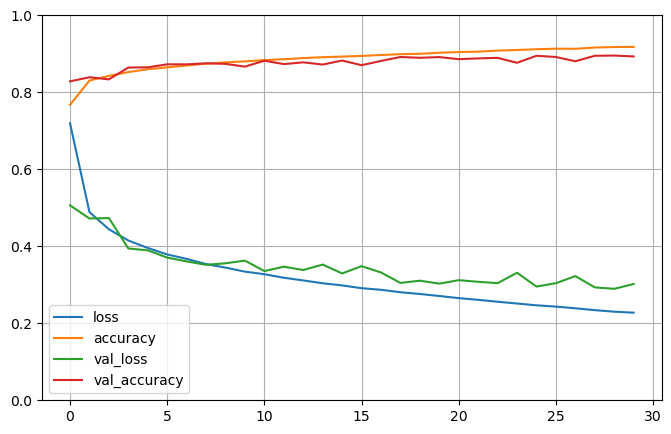

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show() 

评估模型——可视化分析：

可以看到，训练准确率和验证准确率稳步提高，训练损失和验证损失持续下降。另外，验证曲线和训练曲线靠的很近，意味着没有什么过拟合。<br>
提示：在绘制训练曲线时，应该向左移动半个周期。在这个例子中，在训练一开始时，模型在验证集上的表现优于训练集。但实际情况是，验证误差是在每个周期结束后算出来的，而训练误差在每个周期期间，用流动平均误差算出来的。所以训练曲线（译者注，图中橙色的那条）实际应该向左移动半个周期。移动之后，就可以发现在训练开始时，训练和验证曲线几乎是完美重合起来的。<br>
模型收敛判定：通常只要训练时间足够长，训练集的表现就能超越验证集。从图中可以看到，验证损失仍然在下降，模型收敛的还不好，所以训练应该持续下去。只需要再次调用方法fit()即可，因为 Keras 可以从断点处继续。

step4-调节超参数、测试模型：

如果仍然对模型的表现不满意，就需要调节超参数了。首先是学习率。如果调节学习率没有帮助，就尝试换一个优化器（记得调节任何超参数之后都需要重新调节学习率）。如果效果仍然不好，就调节模型自身的超参数，比如层数、每层的神经元数、每个隐藏层的激活函数。还可以调节其它超参数，比如批次大小（通过fit()的参数batch_size，默认是 32）。<br>
当对验证准确率达到满意之后，就可以用测试集评估泛化误差。只需使用evaluate()方法（evaluate()方法包含参数batch_size和sample_weight）

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.0906 - accuracy: 0.8388


[71.09058380126953, 0.8388000130653381]

正如第 2 章所见，测试集的表现通常比验证集上低一点，这是因为超参数根据验证集而不是测试集调节的（但是在这个例子中，我们没有调节过超参数，所以准确率下降纯粹是运气比较差而已）。一定不要在测试集上调节超参数，否则会影响泛化误差。

step5-使用模型进行预测

接下来，就可以用模型的predict()方法对新实例做预测了。因为并没有新实例，所以就用测试集的前 5 个实例来演示：<br>
可以看到，模型会对每个实例的每个类（从 0 到 9）都给出一个概率。比如，对于第一张图，模型预测第 9 类（短靴）的概率是 96%，第 5 类（凉鞋）的概率是 3%，第 7 类（运动鞋）的概率是 1%，剩下的类的概率都是 0。换句话说，模型预测第一张图是鞋，最有可能是短靴，也有可能是凉鞋和运动鞋。如果只关心概率最高的类（即使概率不高），可以使用方法predict_classes()：

In [20]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [21]:
y_pred = np.argmax(y_proba, axis=1)
y_pred, np.array(class_names)[y_pred]

(array([9, 2, 1, 1, 6], dtype=int64),
 array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
       dtype='<U11'))

In [22]:
# 判断结果
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

#### 3-2 使用顺序 API 搭建回归 MLP
接下来使用回归神经网络来处理加州房价问题。简便起见，使用 Scikit-Learn 的fetch_california_housing()函数来加载数据。这个数据集比第 2 章所用的数据集简单，因为它只包括数值特征（没有ocean_proximity），也不包括缺失值。

In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()

# 加载好数据之后，将数据集分割成训练集、验证集和测试集
X_train_full, X_test, y_train_full, y_test = train_test_split(
    diabetes.data, diabetes.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

# 并做特征缩放/标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test) 

使用顺序 API 搭建、训练、评估和使用回归 MLP 做预测，和前面的分类 MLP 很像。区别在于:<br>
——输出层只有一个神经元（因为只想预测一个值而已），也没有使用激活函数，损失函数是均方误差。<br>
——因为数据集有噪音，我们就用一个隐藏层，并且神经元也比之前少，以避免过拟合：

In [30]:
model_seq = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model_seq.compile(loss="huber", optimizer=keras.optimizers.SGD(learning_rate=0.05))

history = model_seq.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
8/8 [==============================] - 0s 19ms/step - loss: 146.3809 - val_loss: 154.9860
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 144.4647 - val_loss: 152.8592
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 141.8734 - val_loss: 149.4807
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 137.4042 - val_loss: 143.0980
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 128.6492 - val_loss: 130.7925
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 113.9396 - val_loss: 113.6819
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 94.5197 - val_loss: 88.1630
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 70.2262 - val_loss: 60.3116
Epoch 9/30
8/8 [==============================] - 0s 5ms/step - loss: 55.3535 - val_loss: 48.3424
Epoch 10/30
8/8 [==============================] - 0s 8ms/step - loss: 50.8118 - val_loss: 44.4270
Epoch 

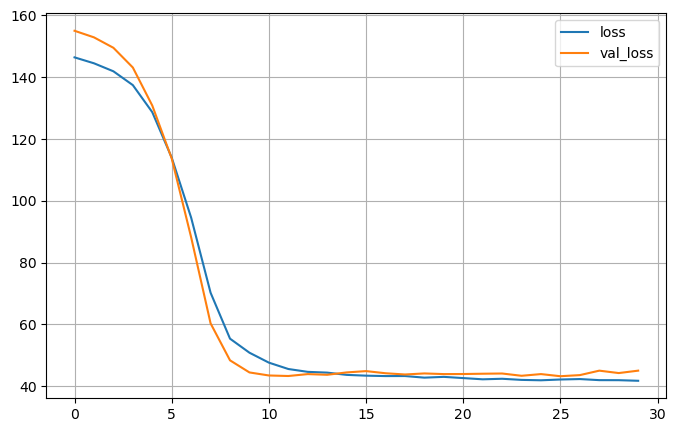

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show() 

In [32]:
mse_test = model_seq.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 46.4115


In [33]:
X_new = X_test[:6] # pretend these are new instances
y_pred = model_seq.predict(X_new) 
y_pred, y_test[:6]

1/1 [==============================] - 0s 48ms/step


(array([[126.57764 ],
        [214.94495 ],
        [ 62.284122],
        [188.37648 ],
        [217.50137 ],
        [105.27481 ]], dtype=float32),
 array([ 85., 296.,  89., 288., 180., 162.]))

可以看到，使用顺序 API 是很方便的。但是，尽管Sequential十分常见，但用它搭建复杂拓扑形态或多输入多输出的神经网络还是不多。所以，Keras 还提供了函数式 API。

#### 3-3使用函数式 API 搭建复杂模型（Wide & Deep 架构）
用函数式 API 可以搭建任意架构。这些架构可被统称为 Wide & Deep 架构。<br>
Wide & Deep 是一个非序列化的神经网络模型。这个架构是 Heng-Tze Cheng 在 2016 年在论文中提出来的。这个模型可以将全部或部分输入与输出层连起来，见图 10-14。这样，就可以既学到深层模式（使用深度路径）和简单规则（使用短路径）。作为对比，常规 MLP 会强制所有数据流经所有层，因此数据中的简单模式在多次变换后会被扭曲。<br>
<img src='https://hands1ml.apachecn.org/docs/img/ae4176d0ecf0ecc5988b0df6135bbf41.png'><br>
我们来搭建一个这样的神经网络，来解决加州房价问题（搭建好模型之后，重复之前的步骤：编译模型、训练、评估、做预测。）：

In [6]:
# 首先创建一个Input对象。包括模型输入的形状shape和数据类型dtype。模型可能会有多种输入。
input_ = keras.layers.Input(shape=X_train.shape[1:])
# 然后，创建一个有 30 个神经元的紧密层，激活函数是 ReLU。创建好之后，将其作为函数，直接将输入传给它。
# 这就是函数式 API 的得名原因。这里只是告诉 Keras 如何将层连起来，并没有导入实际数据。
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# 然后创建第二个隐藏层，还是将其作为函数使用，输入时第一个隐藏层的输出
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 接着，创建一个连接层Concatenate，也是作为函数使用，将输入和第二个隐藏层的输出连起来。
concat = keras.layers.Concatenate()([input_, hidden2])
# 然后创建输出层，只有一个神经元，没有激活函数，将连接层的输出作为输入。
output = keras.layers.Dense(1)(concat)

# 最后，创建一个 Keras 的Model，指明输入和输出。
model = keras.Model(inputs=[input_], outputs=[output]) 

多输入——但是如果你想将部分特征发送给 wide 路径，将部分特征（可以有重叠）发送给 deep 路径，该怎么做呢？答案是可以使用多输入。例如，假设向 wide 路径发送 5 个特征（特征 0 到 4），向 deep 路径发送 6 个特征（特征 2 到 7）<br>
<img src='https://hands1ml.apachecn.org/docs/img/591beaf8e9895b8d896c927527c110d7.png'><br>

In [7]:
a = 10
b = 5

input_A = keras.layers.Input(shape=[a], name="wide_input")
input_B = keras.layers.Input(shape=[b], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output]) 

In [8]:
X_train_A, X_train_B = X_train[:, :a], X_train[:, 10-b:]
X_valid_A, X_valid_B = X_valid[:, :a], X_valid[:, 10-b:]
X_test_A, X_test_B = X_test[:, :a], X_test[:, 10-b:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [9]:
# 但当调用fit()时，不是传入矩阵X_train，而是传入一对矩阵(X_train_A, X_train_B)：每个输入一个矩阵。

model.compile(loss="huber", optimizer=keras.optimizers.SGD(learning_rate=0.01))

history = model.fit((X_train_A, X_train_B), y_train, epochs=30,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/30
8/8 [==============================] - 1s 28ms/step - loss: 146.2618 - val_loss: 156.0320
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 146.0567 - val_loss: 155.8372
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 145.8507 - val_loss: 155.6363
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 145.6321 - val_loss: 155.4184
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 145.3900 - val_loss: 155.1715
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 145.1103 - val_loss: 154.8805
Epoch 7/30
8/8 [==============================] - 0s 5ms/step - loss: 144.7748 - val_loss: 154.5244
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 144.3616 - val_loss: 154.0771
Epoch 9/30
8/8 [==============================] - 0s 5ms/step - loss: 143.8303 - val_loss: 153.4911
Epoch 10/30
8/8 [==============================] - 0s 5ms/step - loss: 143.1288 - val_loss: 152.696

In [10]:
# 同理调用evaluate()或predict()时，X_valid、X_test、X_new也要变化。

huber_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B)) 
y_pred, y_test[:3]

1/1 [==============================] - 0s 48ms/step


(array([[158.21498],
        [177.44557],
        [ 86.24278]], dtype=float32),
 array([ 85., 296.,  89.]))

多输出——有以下要使用多输出的场景：

多任务叠加。例如，你想定位和分类图片中的主要物体。这既是一个回归任务（找到目标中心的坐标、宽度和高度）和分类任务。

多个独立的任务。相似的，对于相同的数据，你可能有多个独立的任务。当然可以每个任务训练一个神经网络，但在多数情况下，同时对所有任务训练一个神经网络，每个任务一个输出，后者的效果更好。这是因为神经网络可以在不同任务间学习有用的数据特征。例如，在人脸的多任务分类时，你可以用一个输出做人物表情的分类（微笑惊讶等等），用另一个输出判断是否戴着眼镜。

另一种情况是作为一种正则的方法（即，一种降低过拟合和提高泛化能力的训练约束）。例如，你想在神经网络中加入一些辅助输出（见图 10-16），好让神经网络的一部分依靠自身就能学到一些东西。<br>
<img src='https://hands1ml.apachecn.org/docs/img/b0edd14407d966c873df644d3df97d67.png'><br>

In [11]:
# 添加额外的输出很容易：只需要将输出和相关的层连起来、将输出写入输出列表就行。 
# 例如，下面的代码搭建的就是图 10-16 的架构：

# output 层前面都一样
a = 10
b = 5

input_A = keras.layers.Input(shape=[a], name="wide_input")
input_B = keras.layers.Input(shape=[b], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output]) 

In [12]:
# 每个输出都要有自己的损失函数。因此在编译模型时，需要传入损失函数列表
# （如果只传入一个损失函数，Keras 会认为所有输出是同一个损失函数）。
# Keras 默认计算所有损失，将其求和得到最终损失用于训练。主输出比辅助输出更值得关心，所以要提高它的权重：

model.compile(loss=["huber", "mae"], loss_weights=[0.95, 0.05], optimizer=keras.optimizers.SGD(learning_rate=0.1)) 

In [13]:
# 此时若要训练模型，必须给每个输出贴上标签。在这个例子中，主输出和辅输出预测的是同一件事，因此标签相同。
# 传入数据必须是(y_train, y_train)（y_valid和y_test也是如此）：

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=30,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) 

Epoch 1/30
8/8 [==============================] - 1s 26ms/step - loss: 144.8017 - main_output_loss: 144.7125 - aux_output_loss: 146.4956 - val_loss: 151.3127 - val_main_output_loss: 151.0667 - val_aux_output_loss: 155.9866
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 112.0217 - main_output_loss: 110.3734 - aux_output_loss: 143.3393 - val_loss: 64.8347 - val_main_output_loss: 60.8536 - val_aux_output_loss: 140.4761
Epoch 3/30
8/8 [==============================] - 0s 5ms/step - loss: 75.9028 - main_output_loss: 73.4897 - aux_output_loss: 121.7513 - val_loss: 59.9988 - val_main_output_loss: 57.2473 - val_aux_output_loss: 112.2758
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 61.1005 - main_output_loss: 59.2785 - aux_output_loss: 95.7188 - val_loss: 70.9648 - val_main_output_loss: 69.4360 - val_aux_output_loss: 100.0122
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 68.6879 - main_output_loss: 68.1133 - aux_output_los

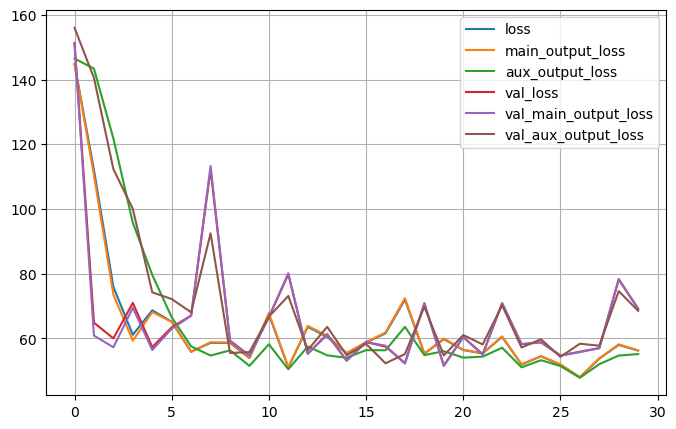

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show() 

In [15]:
# 当评估模型时，Keras 会返回总损失和各个损失值：
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]) 

4/4 [==============================] - 0s 2ms/step - loss: 67.7186 - main_output_loss: 67.8447 - aux_output_loss: 65.3226


In [16]:
# 相似的，方法predict()会返回每个输出的预测值：
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B]) 
y_pred_main, y_pred_aux, y_test[:3]

1/1 [==============================] - 0s 58ms/step


(array([[116.54927],
        [121.75242],
        [ 62.90509]], dtype=float32),
 array([[123.77389],
        [118.20635],
        [ 68.98972]], dtype=float32),
 array([ 85., 296.,  89.]))

#### 3-4使用子类化 API 搭建动态模型
顺序 API 和函数式 API 都是声明式的：只有声明创建每个层以及层的连接方式，才能给模型加载数据以进行训练和推断。<br>
这种方式有其优点：模型可以方便的进行保存、克隆和分享；模型架构得以展示，便于分析；框架可以推断数据形状和类型，便于及时发现错误（加载数据之前就能发现错误）。调试也很容易，因为模型是层的静态图。<br>
但是缺点也很明显：模型是静态的。一些模型包含循环、可变数据形状、条件分支，和其它的动态特点。对于这些情况，或者你只是喜欢命令式编程，不妨使用子类化 API。

对Model类划分子类，在构造器中创建需要的层，调用call()进行计算。例如，创建一个下面的WideAndDeepModel类的实例，就可以创建与前面函数式 API 例子的同样模型，同样可以进行编译、评估、预测：

In [17]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model_class = WideAndDeepModel() 

这个例子和函数式 API 很像，除了不用创建输入；只需要在call()使用参数input，另外的不同是将层的创建和使用分割了。最大的差别是，在call()方法中，你可以做任意想做的事：for循环、if语句、低级的 TensorFlow 操作，可以尽情发挥想象（见第 12 章）！子类化 API 可以让研究者试验各种新创意。

然而代价也是有的：模型架构隐藏在call()方法中，所以 Keras 不能对其检查；不能保存或克隆；当调用summary()时，得到的只是层的列表，没有层的连接信息。另外，Keras 不能提前检查数据类型和形状，所以很容易犯错。所以除非真的需要灵活性，还是使用顺序 API 或函数式 API 吧。

In [18]:
model_class.compile(loss=["huber", "mae"], loss_weights=[0.95, 0.05], optimizer=keras.optimizers.SGD(learning_rate=0.1)) 

In [ ]:
history = model_class.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=30,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])) 

#### 3-5保存和恢复模型
使用顺序 API 或函数式 API 时，保存训练好的 Keras 模型和训练一样简单：<br>
(警告：这种加载模型的方法只对顺序 API 或函数式 API 有用，不适用于子类化 API。对于后者，可以用save_weights()和load_weights()保存参数，其它的就得手动保存恢复了。)

In [20]:
'''model = keras.layers.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])'''

model.save("my_keras_model.h5") 

Keras 使用 HDF5 格式保存模型架构（包括每层的超参数）和每层的所有参数值（连接权重和偏置项）。还保存了优化器（包括超参数和状态）。<br>
通常用脚本训练和保存模型，一个或更多的脚本（或 web 服务）来加载模型和做预测。加载模型很简单：

In [21]:
import h5py

model_h5 = h5py.File("my_keras_model.h5")
loaded_model = keras.models.load_model(model_h5) 

C:\Users\86182\AppData\Local\Temp\ipykernel_17840\85276383.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  model_h5 = h5py.File("my_keras_model.h5")


In [22]:
print([key for key in model_h5.keys()], "\n")  

['model_weights', 'optimizer_weights'] 



In [53]:
mw = model_h5["model_weights"]
print([key for key in mw.keys()], "\n")  
print([key for key in mw['aux_output']['aux_output'].keys()], "\n") 

['aux_output', 'concatenate_2', 'deep_input', 'dense_7', 'dense_8', 'main_output', 'top_level_model_weights', 'wide_input'] 

['bias:0', 'kernel:0'] 

<HDF5 group "/model_weights/aux_output/aux_output" (2 members)> 



In [54]:
print(mw['aux_output']['aux_output']["bias:0"][:], "\n")
print(mw['aux_output']['aux_output']["kernel:0"][:], "\n") 

[0.36385414] 

[[ 5.6218237e-02]
 [ 6.0909653e-01]
 [ 4.1992679e-01]
 [-2.3869459e-01]
 [ 6.8262465e-02]
 [ 2.5933307e-02]
 [-7.8848056e-02]
 [ 1.8442298e-01]
 [ 1.4241171e+00]
 [ 1.4430622e+00]
 [ 1.5947288e+00]
 [ 1.7553724e-01]
 [-4.8300561e-02]
 [ 2.9030817e+00]
 [ 8.0228485e-02]
 [ 1.5065575e-01]
 [-4.0460568e-02]
 [ 1.3917487e+00]
 [-4.2093232e-01]
 [ 4.7097045e-01]
 [ 8.5892759e-02]
 [-3.4432927e-01]
 [ 2.0859296e+00]
 [ 9.0897214e-01]
 [ 1.4416026e+00]
 [ 3.2738011e+00]
 [ 5.2971684e-04]
 [ 5.2757031e-01]
 [-8.6567163e-02]
 [ 1.7165482e-01]] 



保存检查点

但如果训练要持续数个小时呢？在大数据集上训练，训练时间长很普遍。此时，不仅要在训练结束时保存模型检查点，在一定时间间隔内也要保存，以免电脑宕机造成损失。但是如何告诉fit()保存检查点呢？使用调回。<br>
fit()方法接受参数callbacks，可以让用户指明一个 Keras 列表，让 Keras 在训练开始和结束、每个周期开始和结束、甚至是每个批次的前后调用保存数据。例如，ModelCheckpoint可以在每个时间间隔保存检查点，默认是每个周期结束之后：

In [ ]:
[...] # 搭建编译模型
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_cb.h5")
history = model_seq.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

早停

另外，如果训练时使用了验证集，可以在创建检查点时设定save_best_only=True，只有当模型在验证集上取得最优值时才保存模型。这么做可以不必担心训练时间过长和训练集过拟合：只需加载训练好的模型，就能保证是在验证集上表现最好的模型。下面的代码演示了早停（见第 4 章）：

In [ ]:
checkpoint_cbsb = keras.callbacks.ModelCheckpoint("my_keras_model_cbsb.h5",
                                                save_best_only=True)
history = model_seq.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cbsb])

In [47]:
# roll back to best model
model__cbsb = h5py.File("my_keras_model_cbsb.h5")
loaded_model = keras.models.load_model(model__cbsb) 

C:\Users\86182\AppData\Local\Temp\ipykernel_17840\2627437323.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  model__cbsb = h5py.File("my_keras_model_cbsb.h5")


另一种实现早停的方法是使用EarlyStopping调回。当检测到经过几个周期（周期数由参数patience确定），验证集表现没有提升时，就会中断训练，还能自动回到最优模型。可以将保存检查点（避免宕机）和早停（避免浪费时间和资源）结合起来：

In [107]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model_seq.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 

Epoch 1/100
8/8 [==============================] - 0s 68ms/step - loss: 36.4092 - val_loss: 43.9921
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 35.1873 - val_loss: 46.0760
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 35.6342 - val_loss: 43.4661
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 36.7631 - val_loss: 44.2207
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 35.8596 - val_loss: 44.2668
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 35.8428 - val_loss: 43.5298
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 36.4645 - val_loss: 43.9182
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 35.4965 - val_loss: 45.7238
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 36.3777 - val_loss: 44.3256
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 35.5406 - val_loss: 43.5434
Epoch 1

周期数可以设的很大，因为准确率没有提升时，训练就会自动停止。此时，就没有必要恢复最优模型，因为EarlyStopping调回一直在跟踪最优权重，训练结束时能自动恢复。<br>
提示：包keras.callbacks中还有其它可用的调回。<br>
如果还想有其它操控，还可以编写自定义的调回。下面的例子展示了一个可以展示验证集损失和训练集损失比例的自定义（检测过拟合）调回：

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"])) 

val_train = PrintValTrainRatioCallback()
history = model_seq.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train]) 

类似的，还可以实现on_train_begin()、on_train_end()、on_epoch_begin()、on_epoch_end()、on_batch_begin()、和on_batch_end()。如果需要的话，在评估和预测时也可以使用调回（例如为了调试）。对于评估，可以实现on_test_begin()、on_test_end()、on_test_batch_begin()或on_test_batch_end()（通过evaluate()调用）；对于预测，可以实现on_predict_begin()、on_predict_end()、on_predict_batch_begin()或on_predict_batch_end()（通过predict()调用）。

### 4-使用 TensorBoard 进行可视化
TensorBoard 是一个强大的交互可视化工具，使用它可以查看训练过程中的学习曲线、比较每次运行的学习曲线、可视化计算图、分析训练数据、查看模型生成的图片、可视化投射到 3D 的多维数据，等等。TensorBoard 是 TensorFlow 自带的。

要使用 TensorBoard，必须修改程序，将要可视化的数据输出为二进制的日志文件event files。每份二进制数据称为摘要summary，TensorBoard 服务器会监测日志文件目录，自动加载更新并可视化：这样就能看到实时数据（稍有延迟），比如训练时的学习曲线。通常，将 TensorBoard 服务器指向根日志目录，程序的日志写入到它的子目录，这样一个 TensorBoard 服务就能可视化并比较多次运行的数据，而不会将其搞混。

In [69]:
# 我们先定义 TensorBoard 的根日志目录，还有一些根据当前日期生成子目录的小函数。
# 你可能还想在目录名中加上其它信息，比如超参数的值，方便知道查询的内容：

import os
# TensorBoard 的根日志目录
root_logdir = os.path.join(os.curdir, "my_logs")

# 根据当前日期生成子目录的小函数
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%M_%D-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22' 

In [96]:
# %load_ext tensorboard
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir=<'new_logs'>

In [98]:
# Keras 提供了一个TensorBoard()调回：
[...] # 搭建编译模型
tensorboard_cb = keras.callbacks.TensorBoard(log_dir='./m_logs')

history = model_seq.fit(X_train, y_train, epochs=30,
                    callbacks=[tensorboard_cb]) 

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} . is not a directory [Op:CreateSummaryFileWriter]

In [ ]:
%tensorboard --logdir new_logs

In [ ]:
%tensorboard --logdir=./n_logs --port=6006 

### 5-微调神经网络的超参数
神经网络的灵活性同时也是它的缺点：要微调的超参数太多了。不仅架构可能不同，就算对于一个简单的 MLP，就可以调节层数、每层的神经元数、每层使用什么激活函数、初始化的权重，等等。怎么才能知道哪个超参数的组合才是最佳的呢？

5-1<br>
一种方法是直接试验超参数的组合，看哪一个在验证集（或使用 K 折交叉验证）的表现最好。例如，可以使用GridSearchCV或RandomizedSearchCV探索超参数空间，就像第 2 章中那样。要这么做的话，必须将 Keras 模型包装进模仿 Scikit-Learn 回归器的对象中。

In [109]:
# 第一步是给定一组超参数，创建一个搭建和编译 Keras 模型的函数：

# 这个函数创建了一个单回归（只有一个输出神经元）顺序模型，数据形状、隐藏层的层数和神经元数是给定的，使用指定学习率的SGD优化器编译。
# 最好尽量给大多数超参数都设置合理的默认值，就像 Scikit-Learn 那样。
def build_model(n_hidden=2, n_neurons=30, learning_rate=0.01, input_shape=[10]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="huber", optimizer=optimizer)
    return model 

# 然后使用函数build_model()创建一个KerasRegressor：

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model) 

C:\Users\86182\AppData\Local\Temp\ipykernel_17840\1408917596.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


KerasRegressor是通过build_model()将 Keras 模型包装起来的。因为在创建时没有指定任何超参数，使用的是build_model()的默认参数。<br>
现在就可以像常规的 Scikit-Learn 回归器一样来使用它了：使用fit()方法训练，使用score()方法评估，使用predict()方法预测，见下面代码：

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [114]:
mse_test = keras_reg.score(X_test, y_test)

y_pred = keras_reg.predict(X_new) 
y_pred,y_test[:6]

1/1 [==============================] - 0s 26ms/step


(array([111.93998, 212.07639,  81.58882, 184.61082, 214.46767, 113.76679],
       dtype=float32),
 array([ 85., 296.,  89., 288., 180., 162.]))

任何传给fit()的参数都会传给底层的 Keras 模型。另外，分数的意义和 MSE 是相反的（即，分数越高越好）。因为超参数太多，最好使用随机搜索而不是网格搜索（见第 2 章的解释）。下面来探索下隐藏层的层数、神经元数和学习率：

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(0.001, 0.1),
}

# 注意，RandomizedSearchCV使用的是 K 折交叉验证，没有用X_valid和y_valid（只有早停时才使用）。
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)]) 


In [118]:
# 计算完毕后，就能得到最佳参数、最佳得分和训练好的 Keras 模型，如下所示：
rnd_search_cv.best_params_ , rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model 

({'learning_rate': 0.01609827941809288, 'n_hidden': 2, 'n_neurons': 51},
 -46.3124148050944)

现在就可以保存模型、在测试集上评估，如果对效果满意，就可以部署了。使用随机搜索并不难，适用于许多相对简单的问题。但是当训练较慢时（大数据集的复杂问题），这个方法就只能探索超参数空间的一小部分而已。通过手动调节可以缓解一下：首先使用大范围的超参数值先做一次随机搜索，然后根据第一次的结果再做一次小范围的计算，以此类推。这样就能缩放到最优超参数的范围了。但是，这么做很耗时。

5-2<br>
幸好，有比随机搜索更好的探索超参数空间的方法。核心思想很简单：当某块空间的区域表现好时，就多探索这块区域。这些方法可以代替用户做“放大”工作，可以在更短的时间得到更好的结果。下面是一些可以用来优化超参数的 Python 库：

Hyperopt 一个可以优化各种复杂搜索空间（包括真实值，比如学习率和离散值，比如层数）的库。

Hyperas，kopt 或 Talos 用来优化 Keras 模型超参数的库（前两个是基于 Hyperopt 的）。

Keras Tuner Google 开发的简单易用的 Keras 超参数优化库，还有可视化和分析功能。

Scikit-Optimize (skopt) 一个通用的优化库。类BayesSearchCV使用类似于GridSearchCV的接口做贝叶斯优化。

Spearmint 一个贝叶斯优化库。

Hyperband 一个快速超参数调节库，基于 Lisha Li 的论文《Hyperband: A Novel Bandit-Based Approach to Hyperparameter Optimization》。

Sklearn-Deap 一个基于进化算法的超参数优化库，接口类似GridSearchCV。

另外，许多公司也提供超参数优化服务。第 19 章会讨论 Google Cloud AI 平台的超参数调节服务。其它公司有 Arimo 、 SigOpt，和 CallDesk 的 Oscar.

进化算法——超参数调节仍然是活跃的研究领域，其中进化算法表现很突出。例如，在 2017 年的论文《Population Based Training of Neural Networks》中，Deepmind 的作者用统一优化了一组模型及其超参数。Google 也使用了一种进化算法，不仅用来搜索查参数，还可以搜索最佳的神经网络架构；Google 的 AutoML 套间已经可以在云服务上使用了。也许手动搭建神经网络的日子就要结束了？看看 Google 的这篇文章。事实上，用进化算法训练独立的神经网络很成功，已经取代梯度下降了。例如，Uber 在 2017 年介绍了名为 Deep Neuroevolution 的技术，见这里。

尽管有这些工具和服务，知道每个超参数该取什么值仍然是帮助的，可以快速创建原型和收缩搜索范围。后面的文字介绍了选择 MLP 隐藏层数和神经元数的原则，以及如何选择主要的超参数值。

#### 隐藏层数
对于许多问题，开始时只用一个隐藏层就能得到不错的结果。只要有足够多的神经元，只有一个隐藏层的 MLP 就可以对复杂函数建模。但是对于复杂问题，深层网络比浅层网络有更高的参数效率：深层网络可以用指数级别更少的神经元对复杂函数建模，因此对于同样的训练数据量性能更好。

真实世界的数据通常都是有层次化结构的，深层神经网络正式利用了这一点——比如，假设别人让你用绘图软件画一片森林，但你不能复制和粘贴。这样的话，就得花很长时间，你需要手动来画每一棵树，一个树枝然后一个树枝，一片叶子然后一片叶子。如果可以鲜花一片叶子，然后将叶子复制粘贴到整个树枝上，再将树枝复制粘贴到整棵树上，然后再复制树，就可以画出一片森林了，所用的时间可以大大缩短。真实世界的数据通常都是有层次化结构的，深层神经网络正式利用了这一点：浅隐藏层对低级结构（比如各种形状的线段和方向），中隐藏层结合这些低级结构对中级结构（方，圆）建模，深隐藏层和输出层结合中级结构对高级结构（比如，脸）建模。

迁移学习——层级化的结构不仅帮助深度神经网络收敛更快，也提高了对新数据集的泛化能力。例如，如果已经训练好了一个图片人脸识别的模型，现在想训练一个识别发型的神经网络，你就可以复用第一个网络的浅层。不用随机初始化前几层的权重和偏置项，而是初始化为第一个网络浅层的权重和偏置项。这样，网络就不用从多数图片的低级结构开始学起；只要学高级结构（发型）就行了。这就称为迁移学习。

概括来讲，对于许多问题，神经网络只有一或两层就够了。例如，只用一个隐藏层和几百个神经元，就能在 MNIST 上轻松达到 97% 的准确率；同样的神经元数，两个隐藏层，训练时间几乎相同，就能达到 98% 的准确率。对于更复杂的问题，可以增加隐藏层的数量，直到在训练集上过拟合为止。非常复杂的任务，比如大图片分类或语音识别，神经网络通常需要几十层（甚至上百，但不是全连接的，见第 14 章），需要的训练数据量很大。对于这样的网络，很少是从零训练的：常见的是使用预训练好的、表现出众的任务相近的网络，训练可以快得多，需要的数据也可以不那么多（见第 11 章的讨论）。

#### 每个隐藏层的神经元数
输入层和输出层的神经元数是由任务确定的输入和输出类型决定的。例如，MNIST 任务需要28 × 28 = 784个输入神经元和 10 个输出神经元。

所有隐藏层使用同样多的神经元——对于隐藏层，惯用的方法是模拟金字塔的形状，神经元数逐层递减。底层思想是，许多低级特征可以聚合成少得多的高级特征。MNIST 的典型神经网络可能需要 3 个隐藏层，第一层有 300 个神经元，第二层有 200 个神经元，第三层有 100 个神经元。然而，这种方法已经被抛弃了，因为所有隐藏层使用同样多的神经元不仅表现更好，要调节的超参数也只变成了一个，而不是每层都有一个。或者，取决于数据集的情况，有时可以让第一个隐藏层比其它层更大。

使用层数和神经元数都超量的模型，然后使用早停和其它正则技术防止过拟合——和层数相同，可以逐步提高神经元的数量，知道发生过拟合为止。但在实际中，通常的简便而高效的方法是使用层数和神经元数都超量的模型，然后使用早停和其它正则技术防止过拟合。一位 Google 的科学家 Vincent Vanhoucke，称这种方法为“弹力裤”：不浪费时间选择尺寸完美匹配的裤子，而是选择一条大的弹力裤，它能自动收缩到合适的尺寸。通过这种方法，可以避免影响模型的瓶颈层。另一方面，如果某层的神经元太少，就没有足够强的表征能力，保存所有的输入信息（比如，只有两个神经元的的层只能输出 2D 数据，如果用它处理 3D 数据，就会丢失信息）。无论模型网络的其它部分如何强大，丢失的信息也找不回来了。

提示：通常，增加层数比增加每层的神经元的收益更高。

#### 学习率，批次大小和其它超参数
隐藏层的层数和神经元数不是 MLP 唯二要调节的参数。下面是一些其它的超参数和调节策略：

学习率： 学习率可能是最重要的超参数。通常，最佳学习率是最大学习率（最大学习率是超过一定值，训练算法发生分叉的学习率，见第 4 章）的大概一半。找到最佳学习率的方式之一是从一个极小值开始（比如10^(-5)）训练模型几百次，直到学习率达到一个比较大的值（比如 10）。这是通过在每次迭代，将学习率乘以一个常数实现的（例如exp(log(10^6)/500，通过 500 次迭代，从10^(-5)到 10 ）。如果将损失作为学习率的函数画出来（学习率使用 log），能看到损失一开始是下降的。过了一段时间，学习率会变得非常高，损失就会升高：最佳学习率要比损失开始升高的点低一点（通常比拐点低 10 倍）。然后就可以重新初始化模型，用这个学习率开始训练了。第 11 章会介绍更多的学习率优化方法。（最佳学习率还取决于其它超参数，特别是批次大小，所以如果调节了任意超参数，最好也更新学习率。）

优化器： 选择一个更好的优化器（并调节超参数）而不是传统的小批量梯度下降优化器同样重要。第 11 章会介绍更先进的优化器。

批次大小： 批次大小对模型的表现和训练时间非常重要。使用大批次的好处是硬件（比如 GPU）可以快速处理（见第 19 章），每秒可以处理更多实例。因此，许多人建议批次大小开到 GPU 内存的最大值。但也有缺点：在实际中，大批次，会导致训练不稳定，特别是在训练开始时，并且不如小批次模型的泛化能力好。2018 年四月，Yann LeCun 甚至发了一条推特：“朋友之间不会让对方的批次大小超过 32”，引用的是 Dominic Masters 和 Carlo Luschi 的论文《Revisiting Small Batch Training for Deep Neural Networks》，在这篇论文中，作者的结论是小批次（2 到 32）更可取，因为小批次可以在更短的训练时间得到更好的模型。但是，有的论文的结论截然相反：2017 年，两篇论文《Train longer, generalize better: closing the generalization gap in large batch training of neural networks》和《Accurate, Large Minibatch SGD: Training ImageNet in 1 Hour》建议，通过多种方法，比如给学习率热身（即学习率一开始很小，然后逐渐提高，见第 11 章），就能使用大批次（最大 8192）。这样，训练时间就能非常短，也没有泛化鸿沟。因此，一种策略是通过学习率热身使用大批次，如果训练不稳定或效果不好，就换成小批次。

激活函数： 本章一开始讨论过如何选择激活函数：通常来讲，ReLU 适用于所有隐藏层。对于输出层，就要取决于任务。